# Classifier for the Bank Marketing dataset

## Download the dataset

In [277]:
import pandas as pd
# import urllib.request

# Download the dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
# filename = "bank-additional.zip"

# urllib.request.urlretrieve(url, filename)

# # Unzip the file
# import zipfile
# with zipfile.ZipFile(filename, 'r') as zip_ref:
#     zip_ref.extractall(".")


In [278]:

# Load the dataset
data = pd.read_csv("bank-additional/bank-additional-full.csv", sep=";")


In [279]:

# Print a sample of the dataset
print("First few rows of the dataset:")
print(data.head())

# Print feature names
print("\nFeatures in the dataset:")
print(data.columns.tolist())


First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

In [280]:
data.shape

(41188, 21)

In [281]:

# Display basic information about the dataset
print("\nDataset info:")
print(data.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   

## Data Preprocessing

### encoding the categorical values
Since most machine learning algorithms require numerical input, we need to convert categorical features into a numerical format without losing the inherent information they carry.

Categorical variables are features that represent categories or groups. They can be divided into two main types:

Nominal Variables: Categories without any intrinsic order or ranking (e.g., job type, marital status).

Ordinal Variables: Categories with a meaningful order or ranking (e.g., education levels).

Categorical Variables in the Dataset

Nominal Variables: job, marital, contact, month, poutcome.

Ordinal Variables: education.

Binary Variables: default, housing, loan, y (target variable).

In [282]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [283]:
# binary encoding
binary_columns = ['default', 'housing', 'loan', 'y']

# Convert binary columns to numerical integers 1 and 0
for column in binary_columns:
    data[column] = data[column].apply(lambda x: 1 if x == "yes" else 0)

#### Handling missing values

Handling 'unknown' Values

Imputing the missing value i.e 'unknown' in the education and contact categories

In [284]:
from sklearn.impute import SimpleImputer
import numpy as np

# Replace unknown values with the most frequent value in the column
imputer = SimpleImputer(strategy="most_frequent")


data['education'] = data['education'].replace("unknown", np.nan)
data['contact'] = data['contact'].replace('unnknown', np.nan)
data['poutcome'] = data['poutcome'].replace('unknown', np.nan)
data['marital'] = data['marital'].replace('unknown', np.nan)
data['job'] = data['job'].replace('unknown', np.nan)

# Replace unknown values with the most frequent value in the column
data['education'] = imputer.fit_transform(data['education'].values.reshape(-1, 1)).ravel()
data['contact'] = imputer.fit_transform(data['contact'].values.reshape(-1, 1)).ravel()
data['poutcome'] = imputer.fit_transform(data['poutcome'].values.reshape(-1, 1)).ravel()
data['marital'] = imputer.fit_transform(data['marital'].values.reshape(-1, 1)).ravel()
data['job'] = imputer.fit_transform(data['job'].values.reshape(-1, 1)).ravel()

#### Encoding

In [285]:
# use the ordinal encoder to encode the education column
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
                   'high.school', 'professional.course', 'university.degree']
ord_enc = OrdinalEncoder(categories=[education_order])
data["education"] = ord_enc.fit_transform(data[["education"]])


In [286]:
# now encode the remaining categorical columns
categorical_columns = ['job', 'marital', 'contact', 'month', 'poutcome', 'day_of_week']

Using drop_first=True in one-hot encoding is a common and recommended practice to prevent multicollinearity in models that are sensitive to it, such as linear and logistic regression. Dropping one dummy variable does not negatively impact your model's ability to make accurate predictions because the information about the dropped category is still present implicitly. The model interprets the absence of all other categories as belonging to the reference category.

In [287]:
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

In [288]:
data.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   education             41188 non-null  float64
 2   default               41188 non-null  int64  
 3   housing               41188 non-null  int64  
 4   loan                  41188 non-null  int64  
 5   duration              41188 non-null  int64  
 6   campaign              41188 non-null  int64  
 7   pdays                 41188 non-null  int64  
 8   previous              41188 non-null  int64  
 9   emp.var.rate          41188 non-null  float64
 10  cons.price.idx        41188 non-null  float64
 11  cons.conf.idx         41188 non-null  float64
 12  euribor3m             41188 non-null  float64
 13  nr.employed           41188 non-null  float64
 14  y                     41188 non-null  int64  
 15  job_blue-collar    

In [294]:
data

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1.0,0,0,0,261,1,-1,0,1.1,...,1,0,0,0,1,0,1,0,0,0
1,57,4.0,0,0,0,149,1,-1,0,1.1,...,1,0,0,0,1,0,1,0,0,0
2,37,4.0,0,1,0,226,1,-1,0,1.1,...,1,0,0,0,1,0,1,0,0,0
3,40,2.0,0,0,0,151,1,-1,0,1.1,...,1,0,0,0,1,0,1,0,0,0
4,56,4.0,0,0,1,307,1,-1,0,1.1,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,0,1,0,334,1,-1,0,-1.1,...,0,1,0,0,1,0,0,0,0,0
41184,46,5.0,0,0,0,383,1,-1,0,-1.1,...,0,1,0,0,1,0,0,0,0,0
41185,56,6.0,0,1,0,189,2,-1,0,-1.1,...,0,1,0,0,1,0,0,0,0,0
41186,44,5.0,0,0,0,442,1,-1,0,-1.1,...,0,1,0,0,1,0,0,0,0,0


### now processing the numeric features

Handling the missing values

In [293]:
# data['pdays'] = data['pdays'].replace(999, -1)

#### Normalizing the features

Normalize Continuous Numerical Features: Especially when they have different scales.

Normalization Improves Algorithm Performance: For algorithms sensitive to feature scales.

Use Appropriate Scaling Method: Choose between StandardScaler, MinMaxScaler, or RobustScaler based on data distribution and presence of outliers.

Apply Scaling After Splitting Data: To prevent data leakage and ensure that the scaler is not influenced by the testing data.

In [296]:
data['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Different types of normalization

1. Min-Max Scaling (Normalization)
Transforms features to a fixed range, usually [0, 1].

When to Use:

When you know the boundaries of your data.

Useful for algorithms that do not assume a normal distribution.



2. Standardization (Z-score Normalization)
Centers the data around the mean with a standard deviation of 1.

When to Use:

When the data follows a normal distribution.

For algorithms that assume standard normal distribution.



3. Robust Scaling
Uses median and interquartile range, making it robust to outliers.

When to Use:

When your data contains outliers.

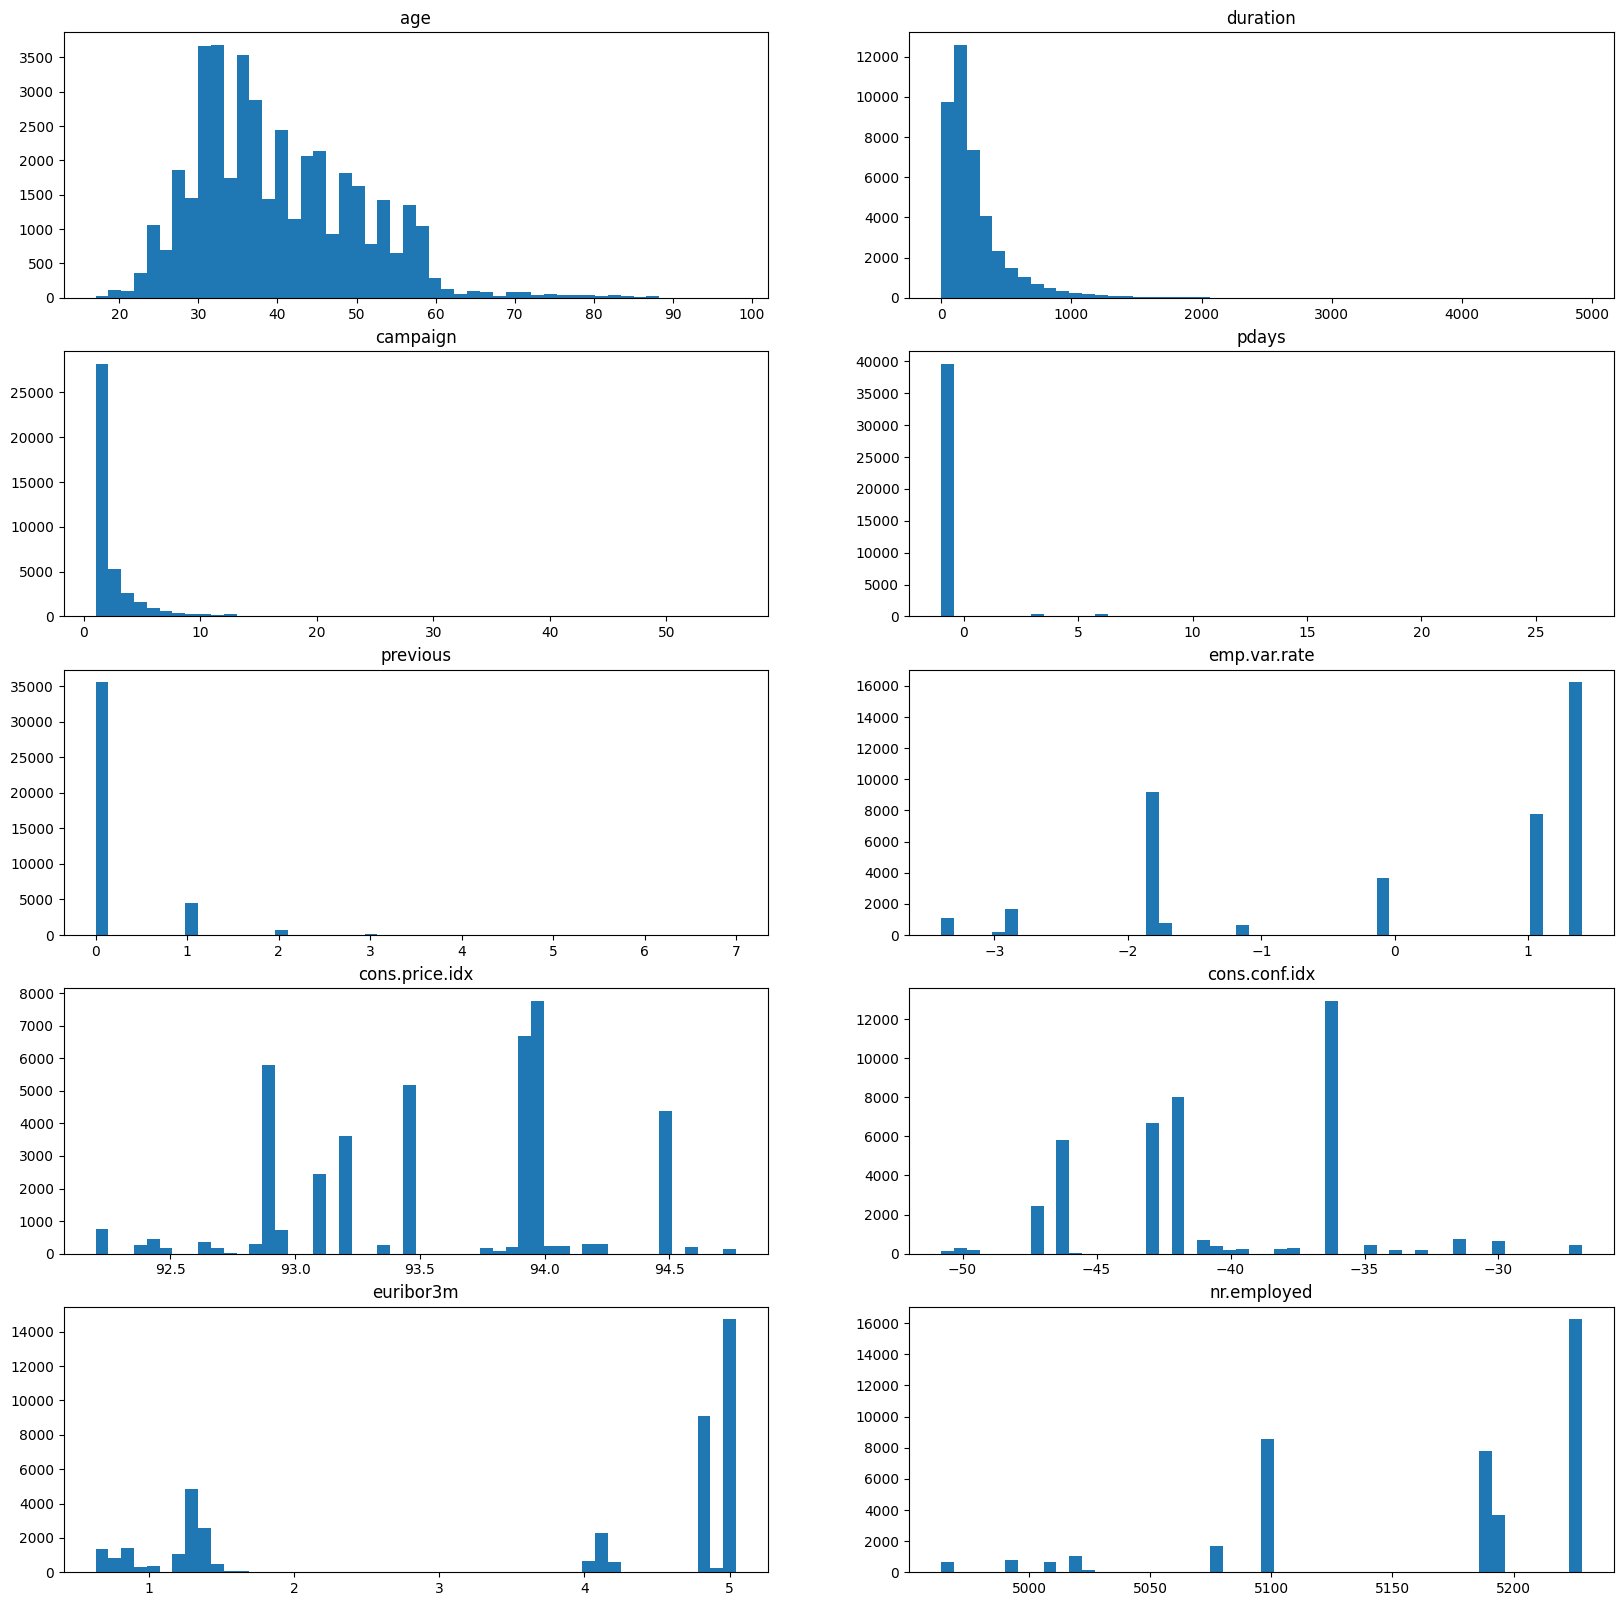

In [303]:
import matplotlib.pyplot as plt

cols_to_norm = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot all the columns distribution 
fig, ax = plt.subplots(5, 2, figsize=(20, 20))
for i, col in enumerate(cols_to_norm):
    ax[i//2, i%2].hist(data[col], bins=50)
    ax[i//2, i%2].set_title(col)
plt.show()
